# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [148]:
# your answer here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from scipy import stats

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [106]:
# your answer here
employee = pd.read_csv("data/Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [107]:
employee.isnull().values.any()

False

#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [108]:
# Method 1
# your answer here
employee.groupby(['Department']).agg({'Salary':'mean'}).reset_index()

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [109]:
# Method 2
# your answer here
salary_dep = employee.pivot_table(index='Department', values='Salary', 
                                 aggfunc='mean')
salary_dep

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [110]:
# your answer here
salary_by_dep = pd.pivot_table(employee, index = ['Department', 'Title'], 
                         aggfunc={"Salary":"mean"})
salary_by_dep


Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [111]:
title_year = pd.pivot_table(employee, index = ['Department', 'Title', 'Years'], 
                         aggfunc={"Salary":"mean"})
title_year

Salary
Department Title     Years        
HR         VP        8          70
           analyst   2          30
                     4          35
IT         VP        8          70
           analyst   1          35
                     2          30
           associate 7          60
Sales      associate 2          55
                     3          55

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [112]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [113]:
# your answer here
n_employee= pd.pivot_table(employee, index=["Department","Title"],
                           values=["Salary"],
               aggfunc={"Department":"count", "Salary":"mean"})

n_employee = n_employee.rename(columns={"Department": "num_employees", "Salary": "Salary mean"})

n_employee

num_employees  Salary mean
Department Title                                
HR         VP                     1         70.0
           analyst                2         32.5
IT         VP                     1         70.0
           analyst                2         32.5
           associate              1         60.0
Sales      associate              2         55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [114]:
salary = pd.pivot_table(employee, index = ['Department', 'Title'], 
                        values=["Salary"],
                        aggfunc={"Department":"count","Salary":[np.median, min, max, np.std]})

salary = salary.rename(columns={"Department": "num_employees"})
salary

num_employees Salary                     
                             count    max median min       std
Department Title                                              
HR         VP                    1     70   70.0  70       NaN
           analyst               2     35   32.5  30  3.535534
IT         VP                    1     70   70.0  70       NaN
           analyst               2     35   32.5  30  3.535534
           associate             1     60   60.0  60       NaN
Sales      associate             2     55   55.0  55  0.000000

Based on the data in the table above, we can infer that in the standard deviation, we have null results in certain categories/titles. This occurs because we only have 1 worker in each of these positions, therefore their salary can not differ from the others.

#### Based on your comments, fill the missing values with an appropriate value.

In [115]:
# your answer here
salary.fillna(0)

num_employees Salary                     
                             count    max median min       std
Department Title                                              
HR         VP                    1     70   70.0  70  0.000000
           analyst               2     35   32.5  30  3.535534
IT         VP                    1     70   70.0  70  0.000000
           analyst               2     35   32.5  30  3.535534
           associate             1     60   60.0  60  0.000000
Sales      associate             2     55   55.0  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [116]:
# your answer here
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [117]:
salary_by_dep = pd.pivot_table(employee, index = ['Department'], 
                        aggfunc={"Department":"count","Salary":[sum]})
salary_by_dep

,Department,Salary
,count,sum
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [118]:
# your answer here
years_of_work = pd.pivot_table(employee, index = ['Department', 'Title'], 
                               aggfunc={"Years": sum , "Salary":np.mean})
years_of_work

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [119]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [120]:
# your answer here
fitbit= pd.read_csv('data/fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [121]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [122]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [123]:
# your answer here
# Correlation value can be measured using corr() function of a pandas data frame in python.
fitbit[["Minutes Lightly Active", "Steps"]].corr()

,Minutes Lightly Active,Steps
Minutes Lightly Active,1.00000,0.39301
Steps,0.39301,1.00000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

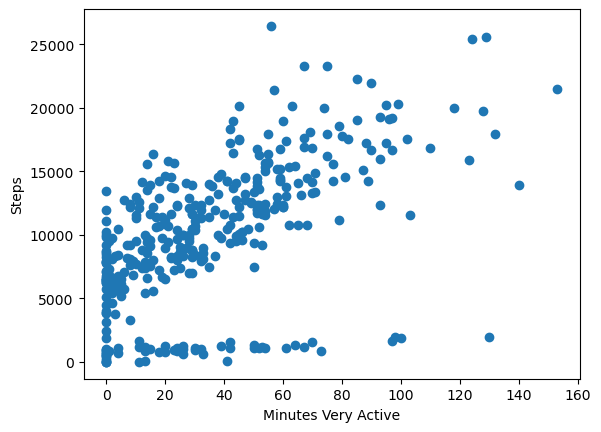

In [124]:
# your answer here
plt.scatter(fitbit["Minutes Very Active"], fitbit["Steps"])
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

We can see that exist a positive correlation between these two variables 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [125]:
# your answer here
fitbit[["Minutes Sedentary", "Steps"]].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

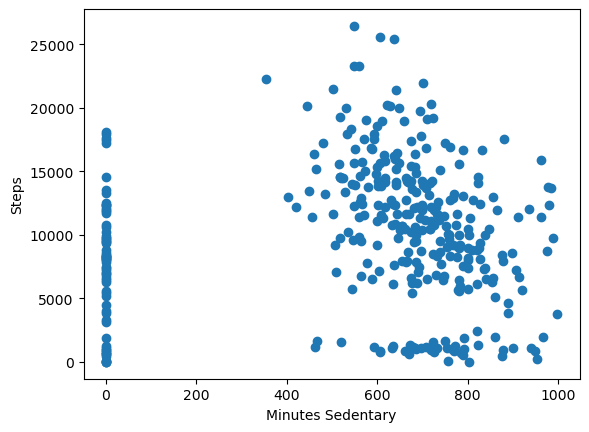

In [126]:
# your answer here
plt.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"])
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

We can see that, the correlation between them are close to zero, that means that are no correlation between them. 

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [127]:
# your answer here
fitbit[["MinutesOfSleep", "Steps"]].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

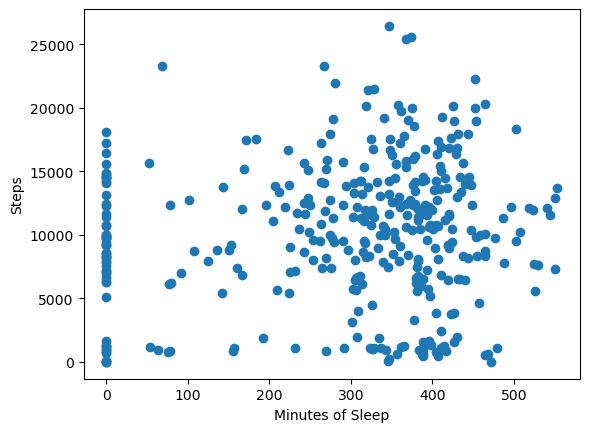

In [128]:
# your answer here
plt.scatter(fitbit["MinutesOfSleep"], fitbit["Steps"])
plt.xlabel("Minutes of Sleep")
plt.ylabel("Steps")
plt.show()

We are not able to say that exists correlation between these two variables

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [129]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


<Axes: >

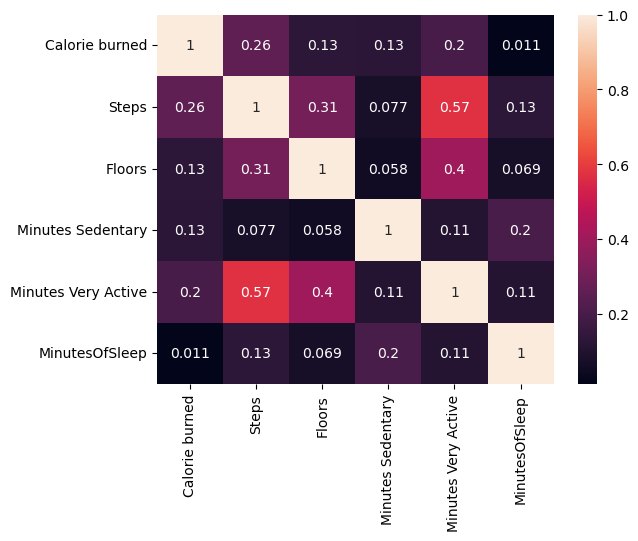

In [130]:
sns.heatmap(cor_fit, annot=True)

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [131]:
# your answer here
cor_fit["Steps"].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [132]:
# your answer here
time_grades = pd.read_csv("data/Time_Grades.csv")
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

C:\Users\Ana\AppData\Local\Temp\ipykernel_10740\2552831223.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_grades["Study time"])


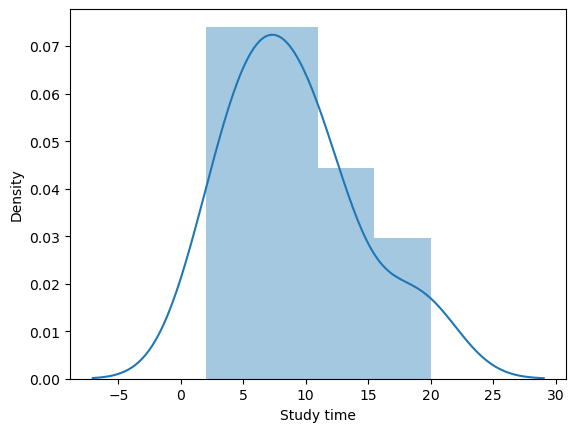

C:\Users\Ana\AppData\Local\Temp\ipykernel_10740\2552831223.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_grades["Grade"])


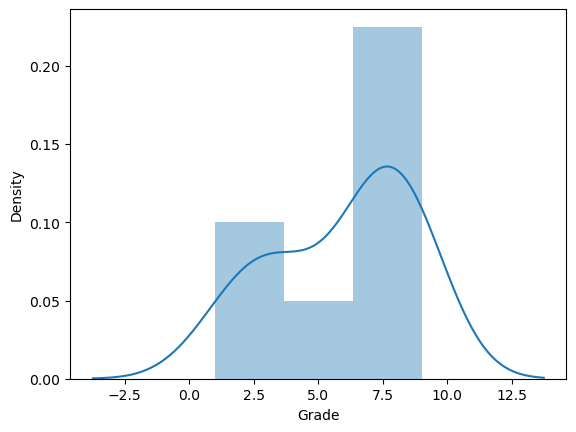

In [147]:
# your answer here
sns.distplot(time_grades["Study time"])
plt.show()
sns.distplot(time_grades["Grade"])
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [155]:
# your answer here
s = time_grades["Study time"]
g = time_grades["Grade"]

print(f"The Pearson correlation {stats.pearsonr(s,g)[0]}")
print(f"The Spearman correlation {stats.spearmanr(s,g)[0]}")

The Pearson correlation 0.7980456073578857
The Spearman correlation 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

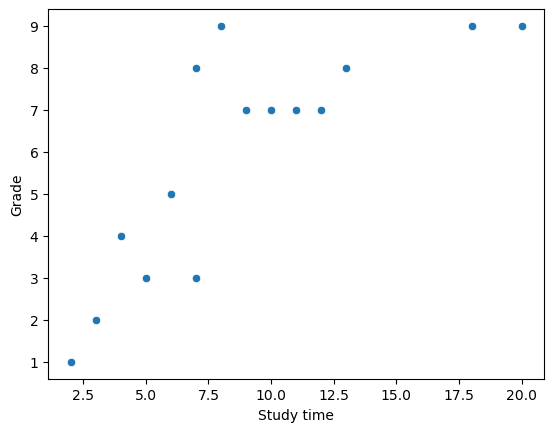

In [157]:
# your answer here
sns.scatterplot(data=time_grades, x="Study time", y="Grade")
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

Pearson measure only linear relationships between two variables and assumes that data is normally distributed. 

Spearman's doesen't require data to follow a normal distribution .There is more sensitive to nonlinear relationships.

Resume: Pearson is good for seeing if variables are connected with straight lines, while Spearman can catch more types of connections that might not be straight lines.